In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
country_data = pd.read_csv('wdi_data_extract.csv')
country_data = country_data.rename(columns={'\ufeffCountry Name': 'Country Name'})
country_data = country_data.dropna(thresh=2)
country_data = country_data.replace("..", np.nan)

country_data.columns[0]

# country_data.columns
country_data['2000 [YR2000]'] = country_data['2000 [YR2000]'].apply(float)


In [7]:
country_data.head()

,﻿Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1995 [YR1995],2000 [YR2000],2005 [YR2005],2010 [YR2010],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,101.094929920886,100.476265721036,103.254202331086,99.0784443357126,99.4598389068067,92.6027850428629,89.7737769801677,NaN
1,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,4.43831058242286,4.6542465771763,4.54656544022227,4.33203777048311,4.53820916606831,4.61170757520736,4.62039281529307,NaN
2,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,96.6566193384628,95.8220191438596,98.7076368908636,94.7464065652295,94.9216297407384,87.9910774676555,85.1533841648746,NaN
3,Afghanistan,AFG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,50.467,50.978,49.999,45.078,37.952,34.065,NaN,NaN
4,Afghanistan,AFG,Completeness of birth registration (%),SP.REG.BRTH.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
indicators = country_data.pivot_table(index='Country Name', columns='Series Name', values='2000 [YR2000]')

In [23]:
indicators.head()

Series Name,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),Completeness of birth registration (%),"Completeness of birth registration, rural (%)","Completeness of birth registration, urban (%)",Completeness of death registration with cause-of-death information (%),Contraceptive prevalence (% of women ages 15-49),...,"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)","Mortality rate, under-5, female (per 1,000)","Mortality rate, under-5, male (per 1,000 live births)",Population ages 0-14 (% of total),Population ages 15-64 (% of total),Population ages 65 and above (% of total),Population growth (annual %),"Population, female (% of total)","Population, total"
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,103.254202,4.546565,98.707637,49.999,12.4,NaN,NaN,NaN,NaN,4.9,...,45.2,137.0,132.7,141.1,48.563639,49.199475,2.236886,3.425807,48.499808,19701940
Albania,59.585866,11.289891,48.295975,18.938,99.1,NaN,NaN,NaN,NaN,57.5,...,11.3,26.2,23.4,28.8,30.263312,62.662202,7.074487,-0.637357,49.466922,3089027
Algeria,62.886169,7.061206,55.824963,19.595,92.6,NaN,NaN,NaN,NaN,64.0,...,21.0,39.7,36.7,42.5,34.272378,61.392567,4.335056,1.346608,49.322334,31183658
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.319470,NaN,57522
Andorra,NaN,NaN,NaN,11.300,NaN,NaN,NaN,NaN,NaN,NaN,...,2.2,4.6,4.2,5.0,NaN,NaN,NaN,1.911142,NaN,65399


In [24]:
list(indicators.columns)

['Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'Completeness of birth registration (%)',
 'Completeness of birth registration, rural (%)',
 'Completeness of birth registration, urban (%)',
 'Completeness of death registration with cause-of-death information (%)',
 'Contraceptive prevalence (% of women ages 15-49)',
 'Death rate, crude (per 1,000 people)',
 'Female headed households (% of households with a female head)',
 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male adults)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, infant, female 

In [30]:
subset = indicators[['Age dependency ratio, young (% of working-age population)',
 'Birth rate, crude (per 1,000 people)']].dropna()

In [31]:
subset.head()

Series Name,"Age dependency ratio, young (% of working-age population)","Birth rate, crude (per 1,000 people)"
Country Name,,
Afghanistan,98.707637,49.999
Albania,48.295975,18.938
Algeria,55.824963,19.595
Angola,96.086665,50.477
Antigua and Barbuda,45.868629,20.240


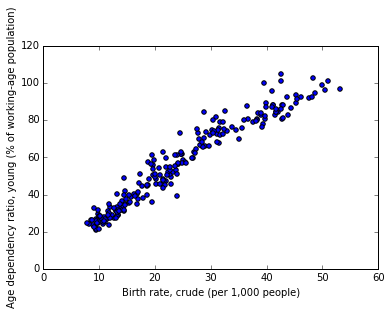

In [32]:
subset.plot(kind='scatter', x='Birth rate, crude (per 1,000 people)', y='Age dependency ratio, young (% of working-age population)')

In [33]:
subset.corr()

Series Name,"Age dependency ratio, young (% of working-age population)","Birth rate, crude (per 1,000 people)"
Series Name,,
"Age dependency ratio, young (% of working-age population)",1.000000,0.968497
"Birth rate, crude (per 1,000 people)",0.968497,1.000000


In [34]:
from sklearn import linear_model

In [41]:
# pull out the x and y from our data

# input data expects x values on their own separate rows
# use double brackets to keep data in a DataFrame, which meets that requirement
input_data = subset[['Birth rate, crude (per 1,000 people)']]
output_data = subset['Age dependency ratio, young (% of working-age population)']

In [46]:
# input_data.head()

regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)

print(regr1.coef_, regr1.intercept_)

# the score
print(regr1.score(input_data, output_data))

[ 1.90592138] 9.49264003853
0.937987058


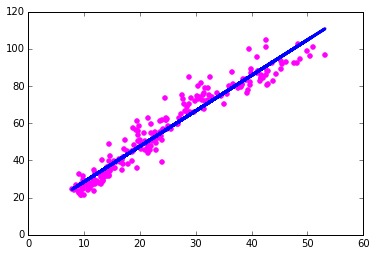

In [48]:
plt.scatter(input_data, output_data, color='magenta')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)

A single X and a single Y are great, but a little boring.

The reality is that there are often multiple factors in correlations.

Let's take a look at feature vectors with multiple elements.

In [49]:
list(indicators.columns)

['Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'Completeness of birth registration (%)',
 'Completeness of birth registration, rural (%)',
 'Completeness of birth registration, urban (%)',
 'Completeness of death registration with cause-of-death information (%)',
 'Contraceptive prevalence (% of women ages 15-49)',
 'Death rate, crude (per 1,000 people)',
 'Female headed households (% of households with a female head)',
 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Maternal mortality ratio (national estimate, per 100,000 live births)',
 'Mortality rate, adult, female (per 1,000 female adults)',
 'Mortality rate, adult, male (per 1,000 male adults)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, infant, female 

In [51]:
multiset = indicators[['Birth rate, crude (per 1,000 people)',
                       'Population growth (annual %)',
                       'Contraceptive prevalence (% of women ages 15-49)']]

In [68]:
multiset = multiset.dropna()

In [69]:
input_data = multiset[['Birth rate, crude (per 1,000 people)',
                       'Population growth (annual %)']]
output_data = multiset['Contraceptive prevalence (% of women ages 15-49)']

In [70]:
output_data.head()

Country Name
Afghanistan     4.900000
Albania        57.500000
Algeria        64.000000
Arab World     44.315424
Armenia        60.500000
Name: Contraceptive prevalence (% of women ages 15-49), dtype: float64

In [72]:
regr2 = linear_model.LinearRegression()
regr2.fit(input_data, output_data)
print(regr2.coef_, regr2.intercept_)

[-1.81659144  2.54023855] 90.2402840117


In [73]:
print(regr2.score(input_data, output_data))

0.688470814427


In [74]:
from mpl_toolkits.mplot3d import Axes3D

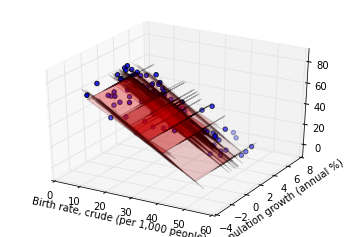

In [77]:
# 3D plots aren't really practical
# but they look cool

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx = input_data['Birth rate, crude (per 1,000 people)']
yy = input_data['Population growth (annual %)']
zz = output_data

predict = regr2.predict(input_data)
x_surf, y_surf = np.meshgrid(xx, yy)

ax.plot_surface(x_surf, y_surf, predict, color='red', alpha=0.1)
ax.scatter(xx, yy, zz)

plt.xlabel('Birth rate, crude (per 1,000 people)')
plt.ylabel('Population growth (annual %)')


## A little help

In [78]:
import itertools

possible_columns = ['A', 'B', 'C', 'D', 'E']


In [84]:
combos = list(itertools.combinations(possible_columns, 2))
print(combos)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'D'), ('C', 'E'), ('D', 'E')]


In [86]:
list(itertools.combinations(possible_columns, 0))

[()]